<a href="https://colab.research.google.com/github/Series-Parallel/Machine_in_Deep_Learning/blob/main/MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  0


In [6]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
def prepare_image(file):
    img_path = 'data/MobileNet-samples/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

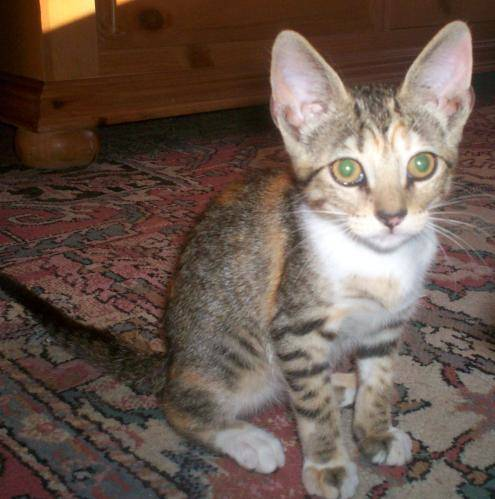

In [16]:
from IPython.display import Image
Image(filename='/content/cat.7.jpg', width=495,height=499)

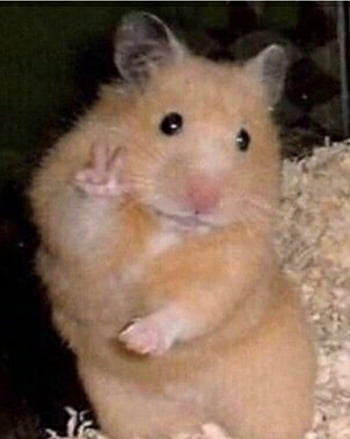

In [20]:
Image(filename='/content/ratatatata.jpg', width=350,height=439)

In [17]:
preprocessed_image = prepare_image('cat.7.jpg')
predictions = mobile.predict(preprocessed_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 994ms/step


In [26]:
preprocessed_image2 = prepare_image('ratatatata.jpg')
predictions2 = mobile.predict(preprocessed_image2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [18]:
results = imagenet_utils.decode_predictions(predictions)
results

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n02124075', 'Egyptian_cat', np.float32(0.94076663)),
  ('n02123045', 'tabby', np.float32(0.04562352)),
  ('n02123159', 'tiger_cat', np.float32(0.009526152)),
  ('n02127052', 'lynx', np.float32(0.0008864624)),
  ('n03223299', 'doormat', np.float32(0.0005559574))]]

In [27]:
results2 = imagenet_utils.decode_predictions(predictions2)
results2

[[('n02342885', 'hamster', np.float32(0.9996815)),
  ('n02443114', 'polecat', np.float32(7.6155826e-05)),
  ('n02328150', 'Angora', np.float32(6.350884e-05)),
  ('n02441942', 'weasel', np.float32(4.388862e-05)),
  ('n02364673', 'guinea_pig', np.float32(2.1221998e-05))]]